In [1]:
import os

import numpy as np
from matplotlib import pyplot as plt
import keras

/home/cjw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
datadir = '/media/cjw/Data/cyto/mmCompensatedTifs/'

In [3]:
mms = os.listdir(datadir)
mms = [x for x in mms if x.endswith(".mm")]
mms

['Fish4_Untreated.mm',
 'Fish3_CCB.mm',
 'Fish4_CCB.mm',
 'Fish1_Untreated.mm',
 'Fish2_ICE.mm',
 'Fish2_CCB.mm',
 'Fish5_CCB.mm',
 'Fish1_Ice.mm',
 'Fish6_CCB.mm',
 'Fish3_Untreated.mm',
 'Fish4_ICE.mm',
 'Fish6_ICE.mm',
 'Fish3_ICE.mm',
 'Fish6_Untreated.mm',
 'Fish2_Untreated.mm',
 'Fish5_Untreated.mm',
 'Fish1_CCB.mm',
 'Fish5_ICE.mm']

In [4]:
label_file ='/media/cjw/Data/MNIST/train-labels-idx1-ubyte'
labmm = np.memmap(label_file, dtype=np.uint8, mode='r', offset=8, shape=(60000))
labels = np.zeros((60000))
labels[:] = labmm

y = np.zeros((len(labels), 10), dtype=np.float32)
print(y.shape, labels.shape)
for i, b in enumerate(labels):
#     print(i,b)
    y[i, int(b)] = 1
    


(60000, 10) (60000,)


In [5]:
header = np.memmap(datadir + mms[0][0:128], dtype=np.int32, shape=(4,))
header

memmap([10000,    64,    64,     5], dtype=int32)

In [6]:
del header

In [7]:
images = np.memmap(datadir + mms[0], offset=128, dtype=np.float32, shape=(10000, 64,64, 5))
train = images[:10000,16:48,16:48,[0,1,3,4]]
yt = y[0:40000]

In [8]:
datagen = keras.preprocessing.image.ImageDataGenerator(data_format='channels_last')
datagen.fit(train)
train.shape

(10000, 32, 32, 4)

(32, 32, 4) (32, 32, 32, 4)
0.92719555


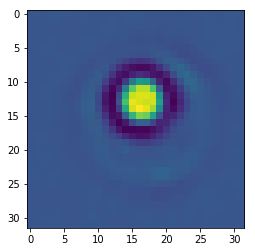

In [9]:
for x in datagen.flow(train, batch_size=32):
    print(x[0].shape, x.shape)
    print(np.max(x))
    plt.imshow(x[0,:,:,0])
    break;

In [51]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Conv2DTranspose, Activation, Flatten, Reshape

model = Sequential()
model.add(Conv2D(32, 7, strides=2, padding='SAME', input_shape=(32, 32, 4)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2D(32, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))
model.add(Conv2D(64, 5, strides=2, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2D(64, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))
model.add(Conv2D(128, 3, strides=2, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(128, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2D(128, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2D(128, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(256))
#model.add(Dense(10, activation='softmax'))
model.add(Dense(128*4*4))
model.add(Activation('relu'))
model.add(Reshape((4,4,128)))
#model.add(Activation('relu'))
model.add(Conv2DTranspose(128, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2DTranspose(128, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2DTranspose(128, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))

model.add(Conv2DTranspose(64, 3, strides=2, padding='same'))
model.add(Activation('relu'))
model.add(Conv2DTranspose(64, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2DTranspose(64, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2DTranspose(64, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))

model.add(Conv2DTranspose(32, 5, strides=2, padding='same'))
model.add(Activation('relu'))
model.add(Conv2DTranspose(32, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
model.add(Conv2DTranspose(32, 3, strides=1, padding='SAME'))
model.add(Activation('relu'))
# model.add(Conv2DTranspose(32, 3, strides=1, padding='SAME'))
# model.add(Activation('relu'))

model.add(Conv2DTranspose(4, 7, strides=2, padding='same'))
model.add(Activation('tanh'))
#print(model.summary())
adam=keras.optimizers.Adam(lr=0.001, decay=0.000)
model.compile(optimizer=adam, loss='mean_squared_error',
             metrics=['accuracy'])

model.fit_generator(datagen.flow(train, train, batch_size=256),
                    steps_per_epoch=400, epochs=40),
                   #validation_data=(images[40000:50000], #images[40000:50000]),
                    #validation_steps=10000/128)





Epoch 1/40
400/400 [==============================] - 39s 98ms/step - loss: 0.0091 - acc: 0.5037
Epoch 2/40
400/400 [==============================] - 35s 88ms/step - loss: 0.0023 - acc: 0.5284
Epoch 3/40
400/400 [==============================] - 35s 88ms/step - loss: 0.0013 - acc: 0.5624
Epoch 4/40
400/400 [==============================] - 35s 88ms/step - loss: 9.8474e-04 - acc: 0.5746
Epoch 5/40
400/400 [==============================] - 35s 88ms/step - loss: 8.5712e-04 - acc: 0.5786
Epoch 6/40
400/400 [==============================] - 35s 88ms/step - loss: 7.9108e-04 - acc: 0.5814
Epoch 7/40
400/400 [==============================] - 35s 88ms/step - loss: 7.3576e-04 - acc: 0.5848
Epoch 8/40
400/400 [==============================] - 35s 88ms/step - loss: 6.9635e-04 - acc: 0.5891
Epoch 9/40
400/400 [==============================] - 35s 88ms/step - loss: 6.6510e-04 - acc: 0.5936
Epoch 10/40
400/400 [==============================] - 35s 88ms/step - loss: 6.2674e-04 - acc: 0.5989
E

(<keras.callbacks.History at 0x7f460ef50710>,)

In [52]:
n=52000

In [53]:
n += 1
#v = np.expand_dims(images[n], axis=0)
#print(v.shape)
g = model.predict(train[0:30])
# gm = np.argmax(g, axis=1)
# vl = labels[50000:]

b = train # images[50000:]#[vl != gm]

len(b)

10000

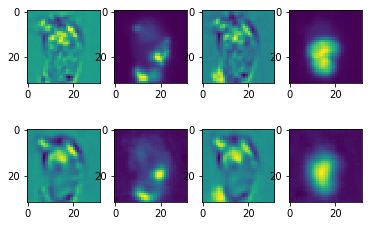

In [59]:
k = 19
plt.subplot(2,4,1)
plt.imshow(b[k,:,:,0])
plt.subplot(2,4,2)
plt.imshow(b[k,:,:,1])
plt.subplot(2,4,3)
plt.imshow(b[k,:,:,2])
plt.subplot(2,4,4)
plt.imshow(b[k,:,:,3])

plt.subplot(2,4,5)
plt.imshow(g[k,:,:,0])
plt.subplot(2,4,6)
plt.imshow(g[k,:,:,1])
plt.subplot(2,4,7)
plt.imshow(g[k,:,:,2])
plt.subplot(2,4,8)
plt.imshow(g[k,:,:,3])